We start by loading the dataset, checks for missing values, and performs one-hot encoding on the 'Area' and 'Item' columns, converting them into binary variables. The processed data is combined into a new DataFrame for further analysis or modeling.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
yield_df = pd.read_csv('yield_df.csv')

# Make a copy of the dataframe for correlation analysis
datacorr = yield_df.copy()

# Check for missing values
print("Missing Values:\n", yield_df.isnull().sum())

# Summary statistics
print("Summary Statistics:\n", yield_df.describe())

# Value counts for categorical columns
print("Area Value Counts:\n", yield_df['Area'].value_counts())
print("Item Value Counts:\n", yield_df['Item'].value_counts())

### One-Hot Encoding of categorical columns 'Area' and 'Item' ###
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit the encoder and transform the 'Area' and 'Item' columns
encoded_cats = encoder.fit_transform(yield_df[['Area', 'Item']])

# Convert the encoded array into a DataFrame
encoded_cols = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(['Area', 'Item']))

# Concatenate the encoded columns with the original DataFrame (excluding the original 'Area' and 'Item')
yield_encoded = pd.concat([yield_df.drop(['Area', 'Item'], axis=1), encoded_cols], axis=1)

# Display the encoded DataFrame
print("Encoded DataFrame:\n", yield_encoded.head())

Missing Values:
 Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64
Summary Statistics:
          Unnamed: 0          Year    hg/ha_yield  \
count  28242.000000  28242.000000   28242.000000   
mean   14120.500000   2001.544296   77053.332094   
std     8152.907488      7.051905   84956.612897   
min        0.000000   1990.000000      50.000000   
25%     7060.250000   1995.000000   19919.250000   
50%    14120.500000   2001.000000   38295.000000   
75%    21180.750000   2008.000000  104676.750000   
max    28241.000000   2013.000000  501412.000000   

       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
count                    28242.00000       28242.000000  28242.000000  
mean                      1149.05598       37076.909344 

Scatterplots of Yield vs Rainfall and Temperature

Generates two scatter plots. The first shows the relationship between yield (hg/ha_yield) and average rainfall, while the second depicts the relationship between yield and average temperature, both with different crop types (Item) highlighted by color. These visualizations help explore how rainfall and temperature impact crop yields.

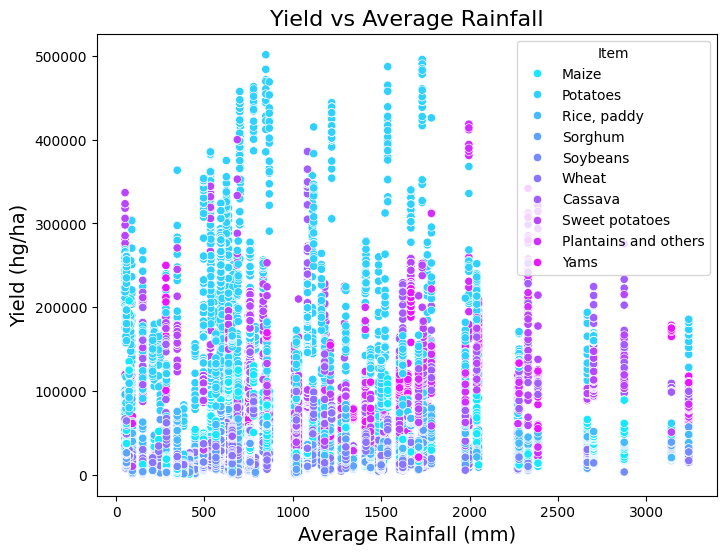

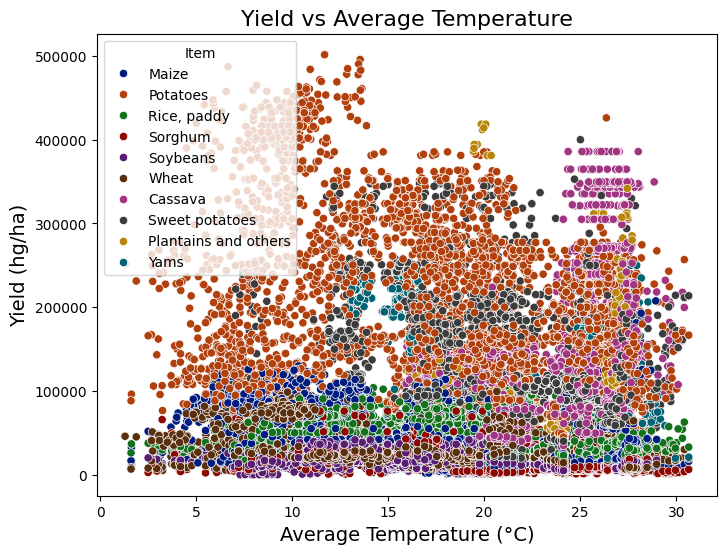

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', hue='Item', data=yield_df, palette='cool')
plt.title('Yield vs Average Rainfall', fontsize=16)
plt.xlabel('Average Rainfall (mm)', fontsize=14)
plt.ylabel('Yield (hg/ha)', fontsize=14)
plt.show()

# Temperature vs Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_temp', y='hg/ha_yield', hue='Item', data=yield_df, palette='dark')
plt.title('Yield vs Average Temperature', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=14)
plt.ylabel('Yield (hg/ha)', fontsize=14)
plt.show()

Yield Distribution Boxplots against the Crop Types and Country regions(top 20 by yield)

We create two box plots. The first plot shows the distribution of crop yields (hg/ha_yield) across different crop types (Item), allowing for comparison of yield variability among crops. The second plot focuses on the top 20 countries/areas with the highest average yield, visualizing how yield varies across these regions. Both plots help identify patterns and outliers in yield distribution by crop type and geographic area.

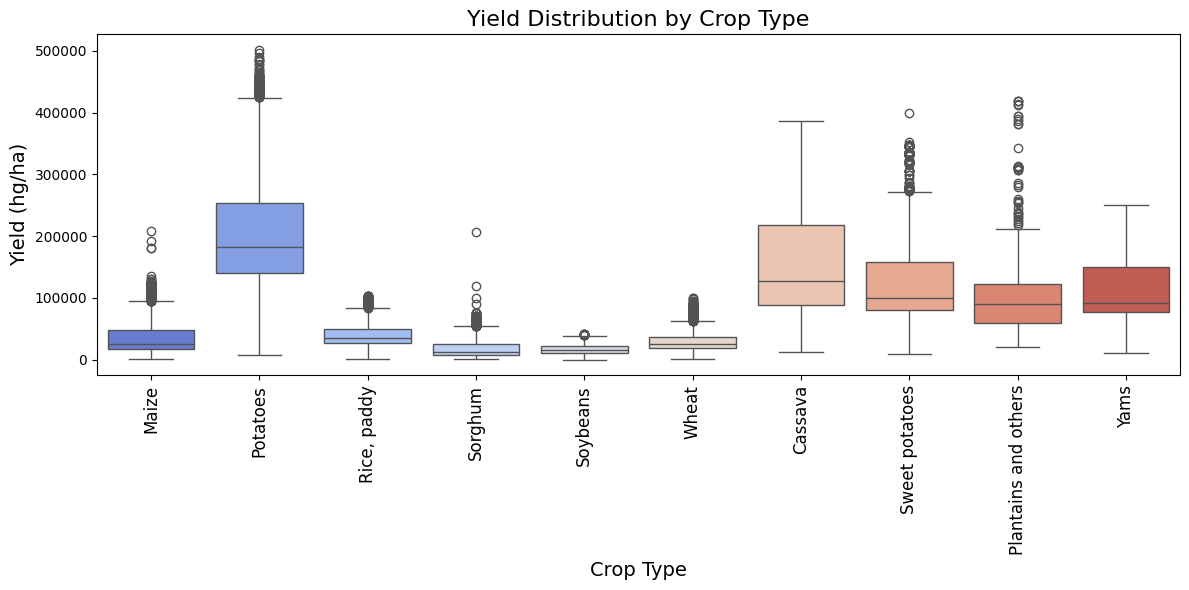

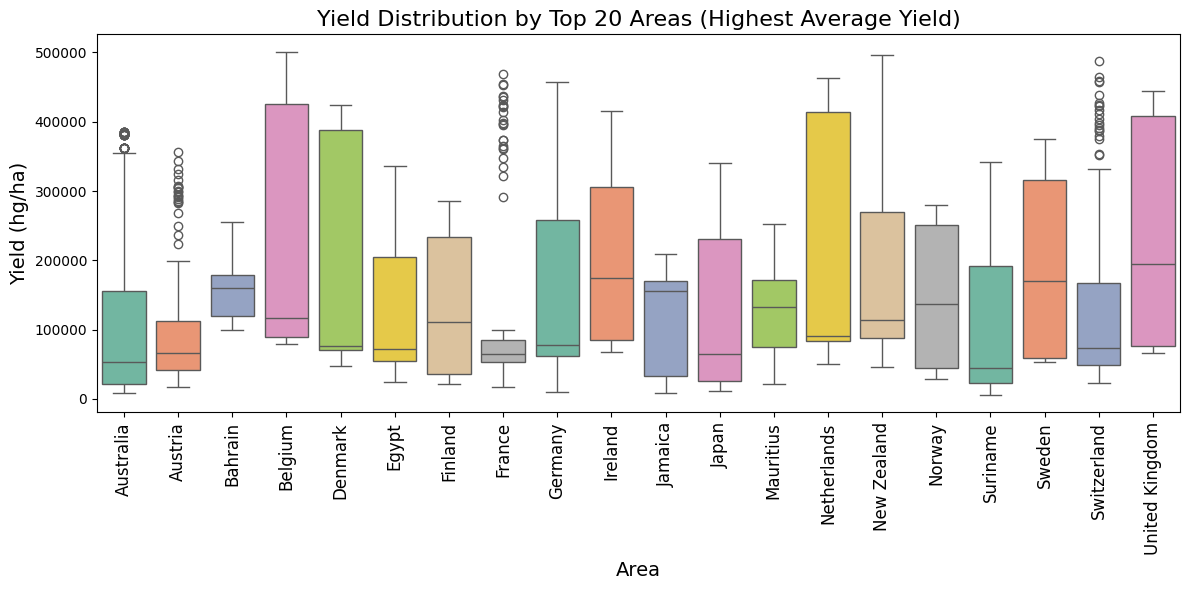

In [11]:
# Box plot for yield distribution by crop type 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item', y='hg/ha_yield', data=yield_df, hue='Item', palette='coolwarm', legend=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Yield Distribution by Crop Type', fontsize=16)
plt.xlabel('Crop Type', fontsize=14)
plt.ylabel('Yield (hg/ha)', fontsize=14)
plt.tight_layout()
plt.show()

# Limit to top 10 countries by average yield
top_areas = yield_df.groupby('Area')['hg/ha_yield'].mean().nlargest(20).index
filtered_df = yield_df[yield_df['Area'].isin(top_areas)]

# Box plot for yield distribution by areas 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area', y='hg/ha_yield', data=filtered_df, hue='Area', palette='Set2', legend=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Yield Distribution by Top 20 Areas (Highest Average Yield)', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Yield (hg/ha)', fontsize=14)
plt.tight_layout()
plt.show()


 Heatmap of Average Yields for Top 20 Areas and Top 10 Crops 

We create a heatmap showing the average yield (hg/ha_yield) for the top 20 areas (countries/regions) and the top 10 crop types based on their average yield. It first filters the dataset to include only these top areas and crops, then groups and calculates the mean yield for each area-crop combination. The heatmap visually displays the relationship between these areas and crops, with color intensity representing the yield value. This helps in comparing yields across different combinations of crops and regions.

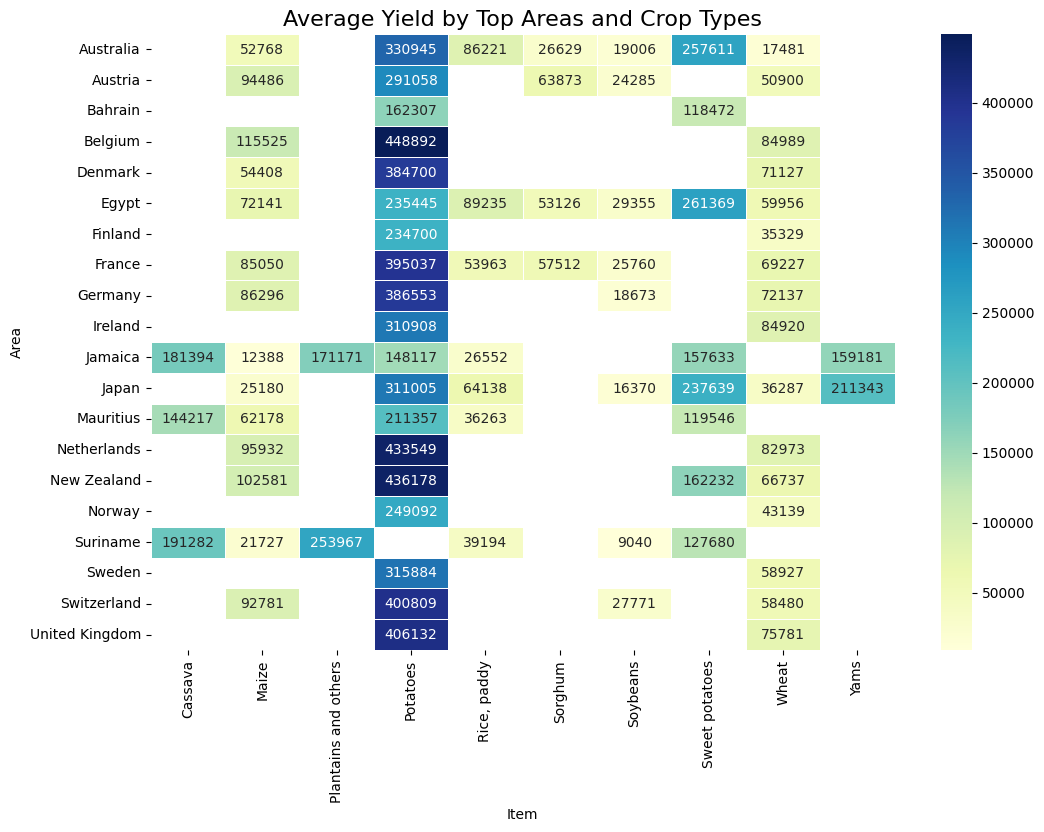

In [10]:
# Limit to top 20 areas by average yield
top_areas = yield_df.groupby('Area')['hg/ha_yield'].mean().nlargest(20).index

# Limit to top 10 crops by average yield
top_crops = yield_df.groupby('Item')['hg/ha_yield'].mean().nlargest(10).index

# Filter the dataframe to include only the top areas and crops
filtered_df = yield_df[(yield_df['Area'].isin(top_areas)) & (yield_df['Item'].isin(top_crops))]

# Create the pivot table for heatmap
area_crop_yield_filtered = filtered_df.groupby(['Area', 'Item'])['hg/ha_yield'].mean().unstack()

# Plot the heatmap with limited areas and crops
plt.figure(figsize=(12, 8))
sns.heatmap(area_crop_yield_filtered, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Average Yield by Top Areas and Crop Types', fontsize=16)
plt.show()



Visualizing Yield vs. Pesticide Usage for Top Areas and Crops (Interactive Scatter Plots)

Scatter plots are created for crop yield (hg/ha_yield) versus pesticide usage (pesticides_tonnes) for different chunks of areas (countries/regions) from the dataset. It first divides the unique areas into smaller groups, each containing a specific number of areas (in this case, 13 per plot), then iterates over these chunks, creating a scatter plot for each one using Plotly Express.

For each scatter plot:

x='hg/ha_yield' represents crop yield on the x-axis.
y='pesticides_tonnes' represents pesticide usage on the y-axis.
Each area is colored differently using a predefined color palette (Set1).
The layout of each plot is customized with a specific title, axis labels, font size, and background color.


In [18]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Number of plots and areas per plot
num_plots = 5
areas_per_plot = 13

# Get unique areas
unique_areas = sorted(yield_df['Area'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i + areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]

# Adjust the last two chunks to ensure correct division
area_chunks[-2] = unique_areas[-11:]

# Loop through each chunk and create scatter plots
for i, area_chunk in enumerate(area_chunks[:num_plots]):  # Limiting to num_plots chunks
    # Filter the dataframe by areas in the current chunk
    plot_df = yield_df[yield_df['Area'].isin(area_chunk)]
    
    # Create a scatter plot with plotly
    fig = px.scatter(plot_df, 
                     x='hg/ha_yield', 
                     y='pesticides_tonnes', 
                     color="Area", 
                     color_discrete_sequence=px.colors.qualitative.Set1,  # Use differentiating color palette
                     title=f'Scatter Plot for Areas {i+1}: Yield vs Pesticides',
                     labels={
                         'hg/ha_yield': 'Crop Yield (hg/ha)',        # Custom x-axis label
                         'pesticides_tonnes': 'Pesticide Usage (Tonnes)'  # Custom y-axis label
                     })

    # Customize the layout (size, titles, axis labels, and title size)
    fig.update_layout(
        title_font_size=20,  
        width=1000,   
        height=700,  
        xaxis_title='Crop Yield (hg/ha)',  
        yaxis_title='Pesticide Usage (Tonnes)',  
        font=dict(
            size=15,  
            color="Black"  
        ),
        plot_bgcolor='rgba(250, 250, 250, 0.9)', 
        paper_bgcolor='rgba(230, 230, 230, 0.9)'  
    )

    # Show the plot
    fig.show()

# Clear the plot from plt if needed (for future plots)
plt.clf()


<Figure size 640x480 with 0 Axes>

Visualization: Exploring Crop Yield Relationships (Scatter and line plots) with parameters like Temperature, Rainfall, Pesticides, Year

Relationships are shown between crop yield (hg/ha_yield) and various factors like pesticide usage, rainfall, temperature, and year, all categorized by crop type (Item). Here's a brief overview of each plot:

Scatter Plot (Pesticides vs. Yield): Displays how pesticide usage (in tonnes) relates to crop yield, colored by crop type.
Scatter Plot (Rainfall vs. Yield): Shows the relationship between average rainfall (mm/year) and crop yield, with each crop type distinguished by color.
Scatter Plot (Temperature vs. Yield): Compares average temperature (°C) against crop yield, with different crop types shown in varying colors.
Line Plot (Year vs. Yield): Plots crop yield trends over time, showing how yields for different crops have changed year by year.

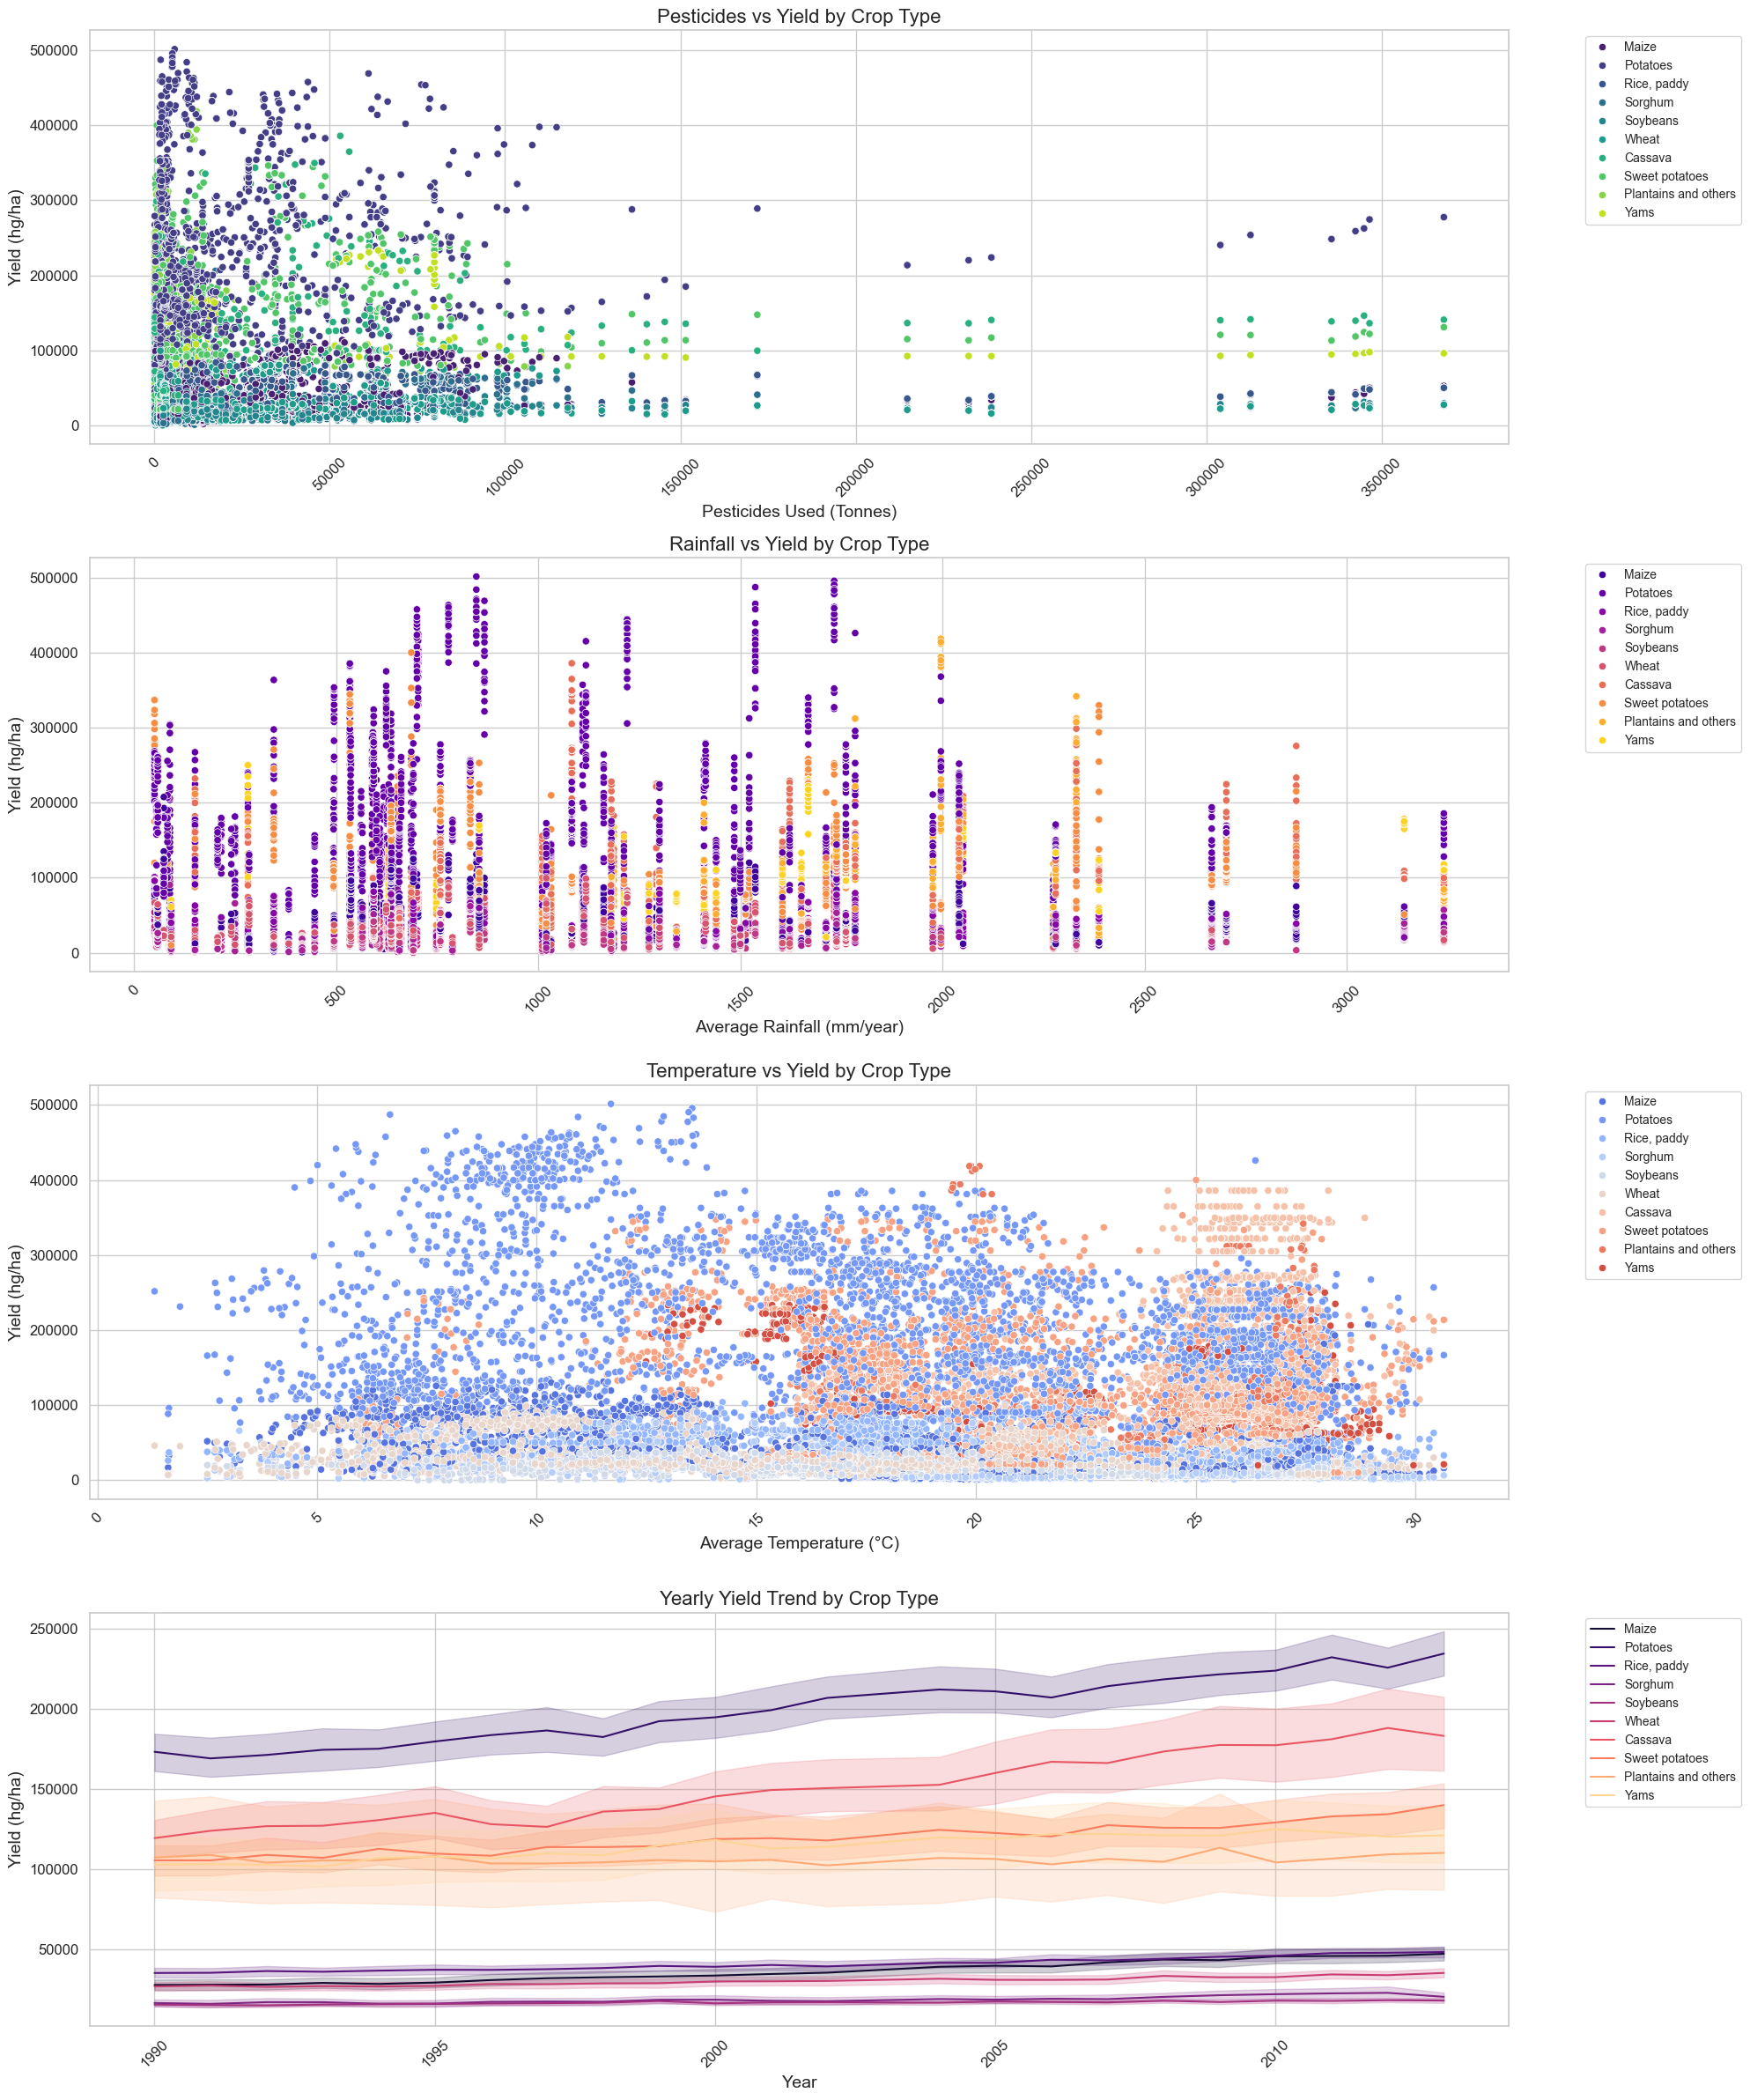

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust figure size and layout
fig, axes = plt.subplots(4, 1, figsize=(20, 24))

# Scatter plot 1: Pesticides vs. Yield
sns.scatterplot(x="pesticides_tonnes", y="hg/ha_yield", hue="Item", data=yield_df, ax=axes[0], legend=True, palette='viridis')
axes[0].tick_params(axis='x', rotation=45, labelsize=12)  # Rotate x-ticks
axes[0].tick_params(axis='y', labelsize=12)
axes[0].set_xlabel('Pesticides Used (Tonnes)', fontsize=14)  
axes[0].set_ylabel('Yield (hg/ha)', fontsize=14) 
axes[0].set_title('Pesticides vs Yield by Crop Type', fontsize=16)  # Add plot title
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Scatter plot 2: Rainfall vs. Yield
sns.scatterplot(x="average_rain_fall_mm_per_year", y="hg/ha_yield", hue="Item", data=yield_df, ax=axes[1], legend=True, palette='plasma')
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].set_xlabel('Average Rainfall (mm/year)', fontsize=14)
axes[1].set_ylabel('Yield (hg/ha)', fontsize=14)
axes[1].set_title('Rainfall vs Yield by Crop Type', fontsize=16)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Scatter plot 3: Temperature vs. Yield
sns.scatterplot(x="avg_temp", y="hg/ha_yield", hue="Item", data=yield_df, ax=axes[2], legend=True, palette='coolwarm')
axes[2].tick_params(axis='x', rotation=45, labelsize=12)
axes[2].tick_params(axis='y', labelsize=12)
axes[2].set_xlabel('Average Temperature (°C)', fontsize=14)
axes[2].set_ylabel('Yield (hg/ha)', fontsize=14)
axes[2].set_title('Temperature vs Yield by Crop Type', fontsize=16)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Line plot 4: Year vs. Yield
sns.lineplot(x="Year", y="hg/ha_yield", hue="Item", data=yield_df, ax=axes[3], legend=True, palette='magma')
axes[3].tick_params(axis='x', rotation=45, labelsize=12)
axes[3].tick_params(axis='y', labelsize=12)
axes[3].set_xlabel('Year', fontsize=14)
axes[3].set_ylabel('Yield (hg/ha)', fontsize=14)
axes[3].set_title('Yearly Yield Trend by Crop Type', fontsize=16)
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()

# Show the plots
plt.show()


Scatterplot for Temperature with different Crop Types

Generating a scatter plot using seaborn and matplotlib to visualize the relationship between crop types (Item) and average temperature (avg_temp).

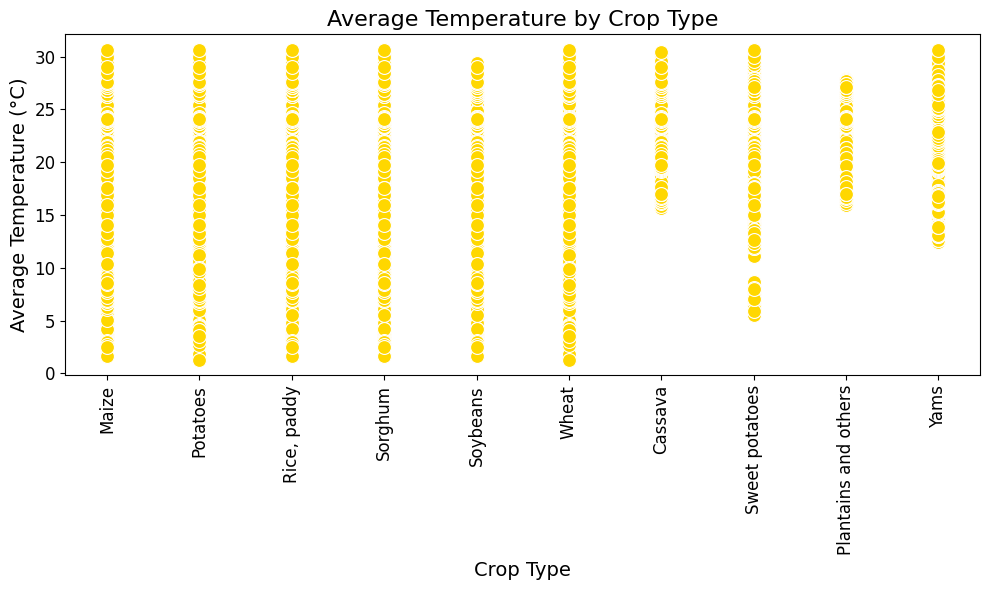

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item', y='avg_temp', data=yield_df, s=100, color='gold')  
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels 
plt.yticks(fontsize=12) 
plt.xlabel('Crop Type', fontsize=14)  # X-axis label
plt.ylabel('Average Temperature (°C)', fontsize=14)  # Y-axis label
plt.title('Average Temperature by Crop Type', fontsize=16)  # Plot title
plt.tight_layout()
plt.show()

Visualizing Temporal Trends: Year-over-Year Changes in Crop Yields

Define a function change_of_years to plot average crop metrics over the years. It then selects the top 5 countries with the highest average crop yield from the dataset yield_df, filters the data for these countries, and generates line plots for each metric over time, displaying trends in agricultural performance

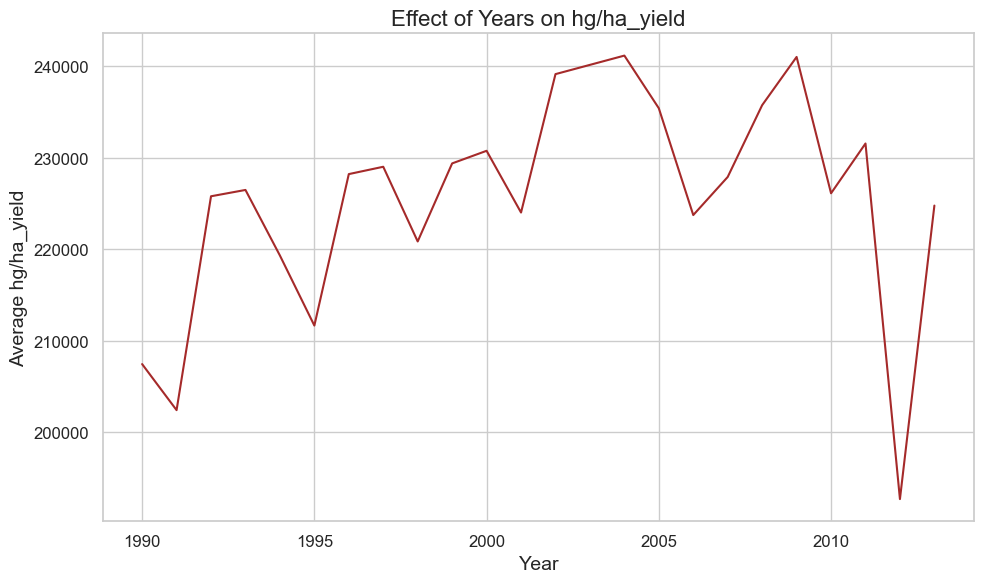

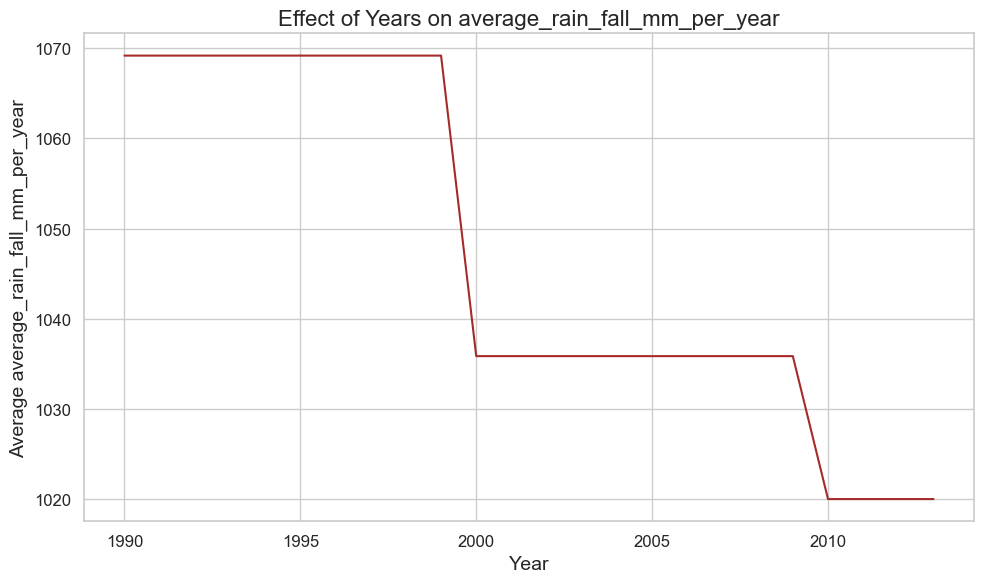

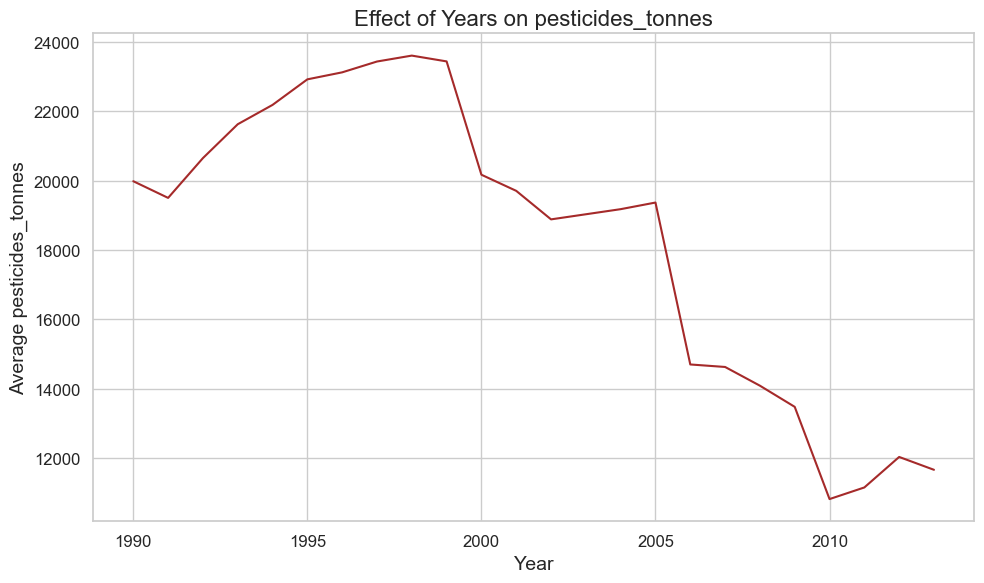

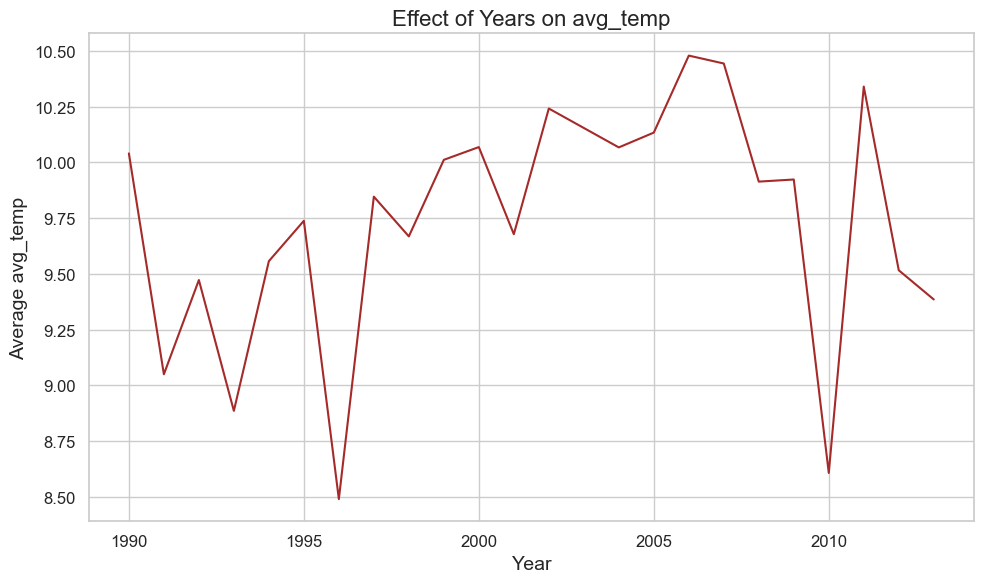

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def change_of_years(data, template='whitegrid', line_color='brown', line_style='-', figsize=(10, 6), title_size=16, label_size=14):
    sns.set_theme(style=template)  
    
   
    col = [column for column in data.columns[3:] if column != 'Year']

    for i in col:
        plt.figure(figsize=figsize)  # Set the size of each plot
        
        # Plot the average values by year
        sns.lineplot(data=data.groupby(['Year'])[i].mean(), color=line_color, linestyle=line_style)
        
        # Update plot titles and labels
        plt.title(f'Effect of Years on {i}', fontsize=title_size)
        plt.xlabel('Year', fontsize=label_size)
        plt.ylabel(f'Average {i}', fontsize=label_size)
        
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        
        plt.tight_layout()  
        plt.show()  # Show the plot after each iteration

# Determine the top 5 countries by average yield
top_countries = yield_df.groupby('Area')['hg/ha_yield'].mean().nlargest(5).index

# Filtering dataframe for the top 5 countries
top_countries_df = yield_df[yield_df['Area'].isin(top_countries)]
#Genrating plots
yplot_top_countries = change_of_years(top_countries_df)
